In [90]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import codecs
import utils

In [91]:
doc = codecs.open('diagnosis.data','rU','UTF-16') #open for reading with "universal" type set
df = pd.read_csv(doc, sep='\t', names=['Temperature', 
                          'Occurrence of nausea', 
                          'Lumbar pain', 
                          'Urine pushing', 
                          'Micturition pains', 
                          'Burning of urethra', 
                          'Inflammation of urinary bladder', 
                          'Nephritis of renal pelvis origin'
                         ]
                 , header=None)
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [92]:
df['Temperature'] = df['Temperature'].str.replace(',','.')
df

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [93]:
df['Temperature'] = df['Temperature'].astype(float)
print(df.dtypes)

Temperature                         float64
Occurrence of nausea                 object
Lumbar pain                          object
Urine pushing                        object
Micturition pains                    object
Burning of urethra                   object
Inflammation of urinary bladder      object
Nephritis of renal pelvis origin     object
dtype: object


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature                       120 non-null    float64
 1   Occurrence of nausea              120 non-null    object 
 2   Lumbar pain                       120 non-null    object 
 3   Urine pushing                     120 non-null    object 
 4   Micturition pains                 120 non-null    object 
 5   Burning of urethra                120 non-null    object 
 6   Inflammation of urinary bladder   120 non-null    object 
 7   Nephritis of renal pelvis origin  120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [95]:
df.describe(include='all')

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120.000000,120,120,120,120,120,120,120
unique,NaN,2,2,2,2,2,2,2
top,NaN,no,yes,yes,no,no,no,no
freq,NaN,91,70,80,61,70,61,70
mean,38.724167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.819132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,37.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,40.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.drop(['Temperature'], axis=1, inplace=True)
df  

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,no,yes,no,no,no,no,no
1,no,no,yes,yes,yes,yes,no
2,no,yes,no,no,no,no,no
3,no,no,yes,yes,yes,yes,no
4,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...
115,no,yes,yes,no,yes,no,yes
116,no,no,no,no,no,no,no
117,yes,yes,no,yes,no,no,yes
118,no,yes,yes,no,yes,no,yes


In [97]:
df['Occurrence of nausea'] = df['Occurrence of nausea'].str.title()
df['Lumbar pain'] = df['Lumbar pain'].str.title()
df['Urine pushing'] = df['Urine pushing'].str.title()
df['Micturition pains'] = df['Micturition pains'].str.title()
df['Burning of urethra'] = df['Burning of urethra'].str.title()
df['Inflammation of urinary bladder'] = df['Inflammation of urinary bladder'].str.title()
df['Nephritis of renal pelvis origin'] = df['Nephritis of renal pelvis origin'].str.title()
df

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,No,Yes,No,No,No,No,No
1,No,No,Yes,Yes,Yes,Yes,No
2,No,Yes,No,No,No,No,No
3,No,No,Yes,Yes,Yes,Yes,No
4,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...
115,No,Yes,Yes,No,Yes,No,Yes
116,No,No,No,No,No,No,No
117,Yes,Yes,No,Yes,No,No,Yes
118,No,Yes,Yes,No,Yes,No,Yes


In [98]:
df.describe()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120,120,120,120,120,120,120
unique,2,2,2,2,2,2,2
top,No,Yes,Yes,No,No,No,No
freq,91,70,80,61,70,61,70


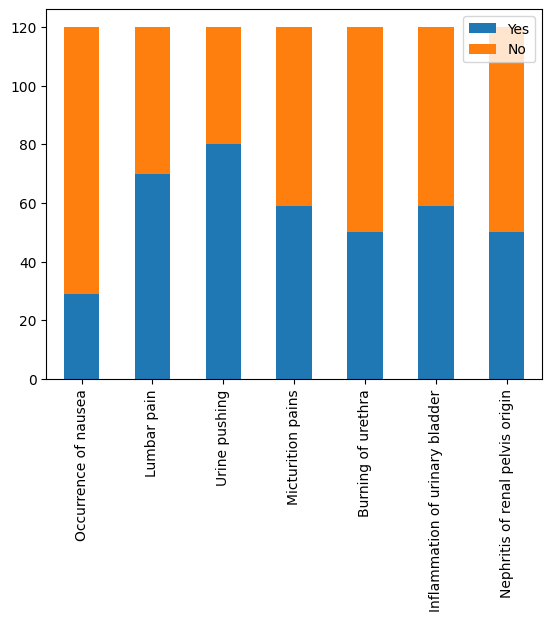

In [99]:
yes = (df == 'Yes').sum()
no = (df == 'No').sum()
myplot = pd.concat([yes,no], axis=1,keys=['Yes','No'])
ax=myplot.plot.bar(stacked=True)
plt.show()

In [100]:
df1 = df[df['Inflammation of urinary bladder'] == 'Yes']
df1

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
1,No,No,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,Yes,No
6,No,No,Yes,Yes,Yes,Yes,No
8,No,No,Yes,Yes,Yes,Yes,No
9,No,No,Yes,Yes,Yes,Yes,No
10,No,No,Yes,Yes,Yes,Yes,No
13,No,No,Yes,Yes,Yes,Yes,No
16,No,No,Yes,Yes,Yes,Yes,No
17,No,No,Yes,Yes,Yes,Yes,No
18,No,No,Yes,Yes,Yes,Yes,No


In [101]:
df2 = df[df['Nephritis of renal pelvis origin'] == 'Yes']
df2

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
60,No,Yes,Yes,No,Yes,No,Yes
61,No,Yes,Yes,No,Yes,No,Yes
62,No,Yes,Yes,No,Yes,No,Yes
63,No,Yes,Yes,No,Yes,No,Yes
64,No,Yes,Yes,No,Yes,No,Yes
65,No,Yes,Yes,No,Yes,No,Yes
66,No,Yes,Yes,No,Yes,No,Yes
67,No,Yes,Yes,No,Yes,No,Yes
68,No,Yes,Yes,No,Yes,No,Yes
69,No,Yes,Yes,No,Yes,No,Yes


In [102]:
df1 = df1.drop(['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'], axis=1)
df1

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
1,No,No,Yes,Yes,Yes
3,No,No,Yes,Yes,Yes
6,No,No,Yes,Yes,Yes
8,No,No,Yes,Yes,Yes
9,No,No,Yes,Yes,Yes
10,No,No,Yes,Yes,Yes
13,No,No,Yes,Yes,Yes
16,No,No,Yes,Yes,Yes
17,No,No,Yes,Yes,Yes
18,No,No,Yes,Yes,Yes


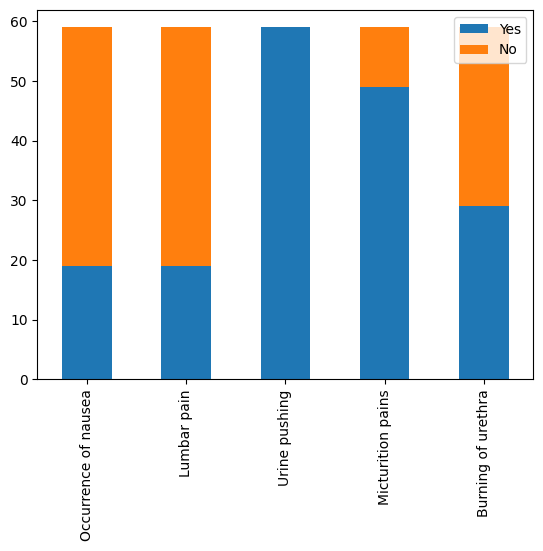

In [103]:
#Inflammation of urinary bladder
yes1 = (df1 == 'Yes').sum()
no1 = (df1 == 'No').sum()
myplot1 = pd.concat([yes1,no1], axis=1,keys=['Yes','No'])
ax=myplot1.plot.bar(stacked=True)
plt.show()

In [104]:
#df1 = df1.rename(columns = {'Occurrence of nausea':'A', 'Lumbar pain':'B', 'Urine pushing':'C', 'Micturition pains':'D', 'Burning of urethra':'E'})
df1

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
1,No,No,Yes,Yes,Yes
3,No,No,Yes,Yes,Yes
6,No,No,Yes,Yes,Yes
8,No,No,Yes,Yes,Yes
9,No,No,Yes,Yes,Yes
10,No,No,Yes,Yes,Yes
13,No,No,Yes,Yes,Yes
16,No,No,Yes,Yes,Yes
17,No,No,Yes,Yes,Yes
18,No,No,Yes,Yes,Yes


In [105]:
Inflammation_of_urinary_bladder = utils.data_prepare(df1)
Inflammation_of_urinary_bladder

[['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains'],
 ['Urine pushing', 'Micturition pains'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing'],
 ['Urine pushing

In [106]:
Rules = list(apriori(Inflammation_of_urinary_bladder, min_support=0.2, min_confidence=0.5))

In [107]:
associationRules = utils.extract(Rules)
rules_df1 = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df1)

46

In [108]:
utils.inspect(associationRules)

The number of associated rules: 46
LHS: [] --> RHS:['Micturition pains'], support: 0.83, confidence: 0.83, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Urine pushing'], support: 1.00, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Burning of urethra'] --> RHS:['Micturition pains'], support: 0.49, confidence: 1.00, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['Micturition pains'] --> RHS:['Burning of urethra'], support: 0.49, confidence: 0.59, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['Burning of urethra'] --> RHS:['Urine pushing'], support: 0.49, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Lumbar pain'] --> RHS:['Micturition pains'], support: 0.32, confidence: 1.00, lift: 1.

In [109]:
rules_df1.nlargest(10, 'Lift')

,LHS,RHS,Support,Confidence,Lift
6,[Lumbar pain],[Occurrence of nausea],0.322034,1.0,3.105263
7,[Occurrence of nausea],[Lumbar pain],0.322034,1.0,3.105263
19,[Lumbar pain],"[Occurrence of nausea, Micturition pains]",0.322034,1.0,3.105263
20,[Occurrence of nausea],"[Lumbar pain, Micturition pains]",0.322034,1.0,3.105263
21,"[Lumbar pain, Micturition pains]",[Occurrence of nausea],0.322034,1.0,3.105263
23,"[Occurrence of nausea, Micturition pains]",[Lumbar pain],0.322034,1.0,3.105263
27,[Lumbar pain],"[Occurrence of nausea, Urine pushing]",0.322034,1.0,3.105263
28,[Occurrence of nausea],"[Urine pushing, Lumbar pain]",0.322034,1.0,3.105263
30,"[Urine pushing, Lumbar pain]",[Occurrence of nausea],0.322034,1.0,3.105263
31,"[Occurrence of nausea, Urine pushing]",[Lumbar pain],0.322034,1.0,3.105263


In [110]:
rules_df1.nlargest(10, 'Support')

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine pushing],1.000000,1.000000,1.000000
0,[],[Micturition pains],0.830508,0.830508,1.000000
10,[],"[Urine pushing, Micturition pains]",0.830508,0.830508,1.000000
11,[Micturition pains],[Urine pushing],0.830508,1.000000,1.000000
12,[Urine pushing],[Micturition pains],0.830508,0.830508,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.000000,1.204082
3,[Micturition pains],[Burning of urethra],0.491525,0.591837,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.000000,1.000000
14,[Burning of urethra],"[Urine pushing, Micturition pains]",0.491525,1.000000,1.204082
15,[Micturition pains],"[Urine pushing, Burning of urethra]",0.491525,0.591837,1.204082


In [111]:
rules_df1.nlargest(10, 'Confidence')

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine pushing],1.000000,1.0,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.0,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.0,1.000000
5,[Lumbar pain],[Micturition pains],0.322034,1.0,1.204082
6,[Lumbar pain],[Occurrence of nausea],0.322034,1.0,3.105263
7,[Occurrence of nausea],[Lumbar pain],0.322034,1.0,3.105263
8,[Lumbar pain],[Urine pushing],0.322034,1.0,1.000000
9,[Occurrence of nausea],[Micturition pains],0.322034,1.0,1.204082
11,[Micturition pains],[Urine pushing],0.830508,1.0,1.000000
13,[Occurrence of nausea],[Urine pushing],0.322034,1.0,1.000000


In [112]:
rules_df1[rules_df1['LHS'].apply(lambda x: len(x) > 0)].nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
11,[Micturition pains],[Urine pushing],0.830508,1.000000,1.000000
12,[Urine pushing],[Micturition pains],0.830508,0.830508,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.000000,1.204082
3,[Micturition pains],[Burning of urethra],0.491525,0.591837,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.000000,1.000000
14,[Burning of urethra],"[Urine pushing, Micturition pains]",0.491525,1.000000,1.204082
15,[Micturition pains],"[Urine pushing, Burning of urethra]",0.491525,0.591837,1.204082
16,"[Burning of urethra, Micturition pains]",[Urine pushing],0.491525,1.000000,1.000000
17,"[Urine pushing, Burning of urethra]",[Micturition pains],0.491525,1.000000,1.204082
18,"[Urine pushing, Micturition pains]",[Burning of urethra],0.491525,0.591837,1.204082
